In [2]:

############################################################
# Alibaba Cloud German AI Challenge 2018
# KF 2018/12/06
############################################################
# I. Imports and Paths
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py

# Check current working directory
os.getcwd()

# Set paths
base_dir = os.path.expanduser('/tmp/german_dataset')
path_training = os.path.join(base_dir, 'training.h5')
path_validation = os.path.join(base_dir, 'validation.h5')

# Validate the paths
os.listdir(base_dir)

['validation.h5', 'round1_test_a_20181109.h5', 'training.h5']

In [3]:
# II. Overview of the Data
fid_training = h5py.File(path_training, 'r')
fid_validation = h5py.File(path_validation, 'r')

# Have a look at keys stored in the h5 files
print("Overview of Data:")
print('='*60)
print('Training data keys   :', list(fid_training.keys()))
print('Validation data keys :', list(fid_validation.keys()))

print('-'*60)
print("Training data shapes:")
s1_training = fid_training['sen1']
s2_training = fid_training['sen2']
label_training = fid_training['label']
print('  Sentinel 1 data shape :', s1_training.shape)
print('  Sentinel 2 data shape :', s2_training.shape)
print('  Label data shape      :', label_training.shape)
print('-'*60)
print("Validation data shapes:")
s1_validation = fid_validation['sen1']
s2_validation = fid_validation['sen2']
label_validation = fid_validation['label']
print('  Sentinel 1 data shape :', s1_validation.shape)
print('  Sentinel 2 data shape :', s2_validation.shape)
print('  Label data shape      :', label_validation.shape)

Overview of Data:
Training data keys   : ['label', 'sen1', 'sen2']
Validation data keys : ['label', 'sen1', 'sen2']
------------------------------------------------------------
Training data shapes:
  Sentinel 1 data shape : (352366, 32, 32, 8)
  Sentinel 2 data shape : (352366, 32, 32, 10)
  Label data shape      : (352366, 17)
------------------------------------------------------------
Validation data shapes:
  Sentinel 1 data shape : (24119, 32, 32, 8)
  Sentinel 2 data shape : (24119, 32, 32, 10)
  Label data shape      : (24119, 17)


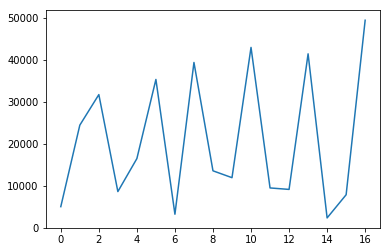

In [4]:
## compute and plot the quantity for each col
label_qty = np.sum(label_training, axis=0)
plt.plot(label_qty)
plt.show()

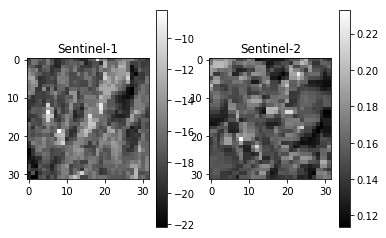

In [5]:
# Visualization, plot the first pair of Sentinel-1 and Sentinel-2 patches of training.h5
plt.subplot(121)
plt.imshow(10*np.log10(s1_training[0,:,:,4]),cmap=plt.cm.get_cmap('gray'));
plt.colorbar()
plt.title('Sentinel-1')

plt.subplot(122)
plt.imshow(s2_training[0,:,:,1],cmap=plt.cm.get_cmap('gray'));
plt.colorbar()
plt.title('Sentinel-2')

plt.show()

In [6]:
### simple classification example
### Training part

from sklearn.linear_model import SGDClassifier

train_s1 = s1_training
train_s2 = s2_training
train_label = label_training
clf = SGDClassifier()

train_y = np.argmax(train_label, axis=1)
classes = list(set(train_y))
batch_size = 100000
n_sampels = train_s1.shape[0]

for i in range(0, n_sampels, batch_size):
    ## this is an idea for batch training
    ## you can relpace this loop for deep learning methods
    if i % batch_size * 10 == 0:
        print("done %d/%d" % (i, n_sampels))
    start_pos = i
    end_pos = min(i + batch_size, n_sampels)
    train_s1_batch = np.asarray(train_s1[start_pos:end_pos, :, :, :])
    train_s2_batch = np.asarray(train_s2[start_posjjjjkkjj:end_pos, :, :, :])
    cur_batch_size = train_s2_batch.shape[0]
    train_s1_batch = train_s1_batch.reshape((cur_batch_size, -1))
    train_s2_batch = train_s2_batch.reshape((cur_batch_size, -1))
    train_X_batch = np.hstack([train_s1_batch, train_s2_batch])
    label_batch = train_y[start_pos:end_pos]
    clf.partial_fit(train_X_batch, label_batch, classes=classes)

done 0/352366


MemoryError: 

In [21]:
### make a prediction on validation
pred_y = []
train_val_y = np.argmax(label_validation, axis=1)
batch_size = 10000
n_val_samples = s2_validation.shape[0]
for i in range(0, n_val_samples, batch_size):
    start_pos = i
    end_pos = min(i + batch_size, n_val_samples)
    val_s1_batch = np.asarray(s1_validation[start_pos:end_pos, :, :, :])
    val_s2_batch = np.asarray(s2_validation[start_pos:end_pos, :, :, :])
    cur_batch_size = val_s2_batch.shape[0]
    val_s1_batch = val_s1_batch.reshape((cur_batch_size, -1))
    val_s2_batch = val_s2_batch.reshape((cur_batch_size, -1))
    val_X_batch = np.hstack([val_s1_batch, val_s2_batch])
    tmp_pred_y = clf.predict(val_X_batch)
    pred_y.append(tmp_pred_y)
pred_y = np.hstack(pred_y)

In [16]:
from sklearn.metrics import classification_report
print classification_report(train_val_y, pred_y)

             precision    recall  f1-score   support

          0       0.06      0.07      0.07       256
          1       0.07      0.06      0.07      1254
          2       0.04      0.04      0.04      2353
          3       0.08      0.13      0.10       849
          4       0.04      0.00      0.00       757
          5       0.16      0.02      0.03      1906
          6       0.00      0.00      0.00       474
          7       0.24      0.46      0.32      3395
          8       0.20      0.01      0.02      1914
          9       0.10      0.06      0.08       860
         10       0.67      0.58      0.62      2287
         11       0.02      0.01      0.01       382
         12       0.00      0.00      0.00      1202
         13       0.45      0.28      0.35      2747
         14       0.01      0.00      0.01       202
         15       0.06      0.30      0.10       672
         16       0.53      0.90      0.67      2609

avg / total       0.25      0.28      0.24  

/root/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
